# EMD model

In [1]:
# author: StevenLi
import matplotlib.pyplot as plt
import PyEMD
import numpy as np
import time
%matplotlib inline

import file_walker

Import file_walker
Init file_walker Succeed.


In [2]:
SITE_CODE = "722860"
# SITE_CODE = "745700"
paths = file_walker.file_walker().main(SITE_CODE)
print("data count:", len(paths))

Init file_walker Succeed.
[Errno 17] File exists: 'data_op/722860/'
[Sun Aug  1 19:21:08 2021]:data/2013/722860-23119-2013.op.gz > data_op/722860/722860-23119-2013.op
[Sun Aug  1 19:21:08 2021]:data/2014/722860-23119-2014.op.gz > data_op/722860/722860-23119-2014.op
[Sun Aug  1 19:21:08 2021]:data/2015/722860-23119-2015.op.gz > data_op/722860/722860-23119-2015.op
[Sun Aug  1 19:21:08 2021]:data/2012/722860-23119-2012.op.gz > data_op/722860/722860-23119-2012.op
[Sun Aug  1 19:21:08 2021]:data/1944/722860-23119-1944.op.gz > data_op/722860/722860-23119-1944.op
[Sun Aug  1 19:21:08 2021]:data/1943/722860-23119-1943.op.gz > data_op/722860/722860-23119-1943.op
[Sun Aug  1 19:21:08 2021]:data/1988/722860-23119-1988.op.gz > data_op/722860/722860-23119-1988.op
[Sun Aug  1 19:21:08 2021]:data/1981/722860-23119-1981.op.gz > data_op/722860/722860-23119-1981.op
[Sun Aug  1 19:21:08 2021]:data/1975/722860-23119-1975.op.gz > data_op/722860/722860-23119-1975.op
[Sun Aug  1 19:21:08 2021]:data/1972/7228

## 将数据塞进字典里

In [3]:
def open_file(file_name, show_index = False):
    """打开op文件并将温度信息抽取"""
    print(f"[{round(time.time(),2)}]","open file:",path)
    with open(file_name) as f:
        data_read = f.read().split("\n")
    print(f"[{round(time.time(),2)}]","close file:",path)
    print(f"[{round(time.time(),2)}]","decoding file:",path)
    tem_avg, tem_max, tem_min, index = [], [], [], []
    for i in data_read[1:-1]:
        tem_avg.append(float(i[25:30]))
        tem_max.append(float(i[103:108]))
        tem_min.append(float(i[111:116]))
        index.append([i[14:22], file_name])
        if i[25:30] == 999.9 or i[103:108] == 999.9 or i[111:116] == 999.9:
            print("Missing data point", i)
    return (tem_avg, tem_min, tem_max, index) if show_index else (tem_avg, tem_min, tem_max)

In [4]:
tem_avg, tem_min, tem_max, index = {}, {}, {}, {}
for path in paths:
    year = path.split('/')[-1].split("-")[-1].split(".")[0]
    tem_avg[year], tem_min[year], tem_max[year], index[year] = open_file(path, show_index = True)

[1627816869.33] open file: data_op/722860/722860-23119-2013.op
[1627816869.33] close file: data_op/722860/722860-23119-2013.op
[1627816869.34] decoding file: data_op/722860/722860-23119-2013.op
[1627816869.34] open file: data_op/722860/722860-23119-2014.op
[1627816869.34] close file: data_op/722860/722860-23119-2014.op
[1627816869.34] decoding file: data_op/722860/722860-23119-2014.op
[1627816869.34] open file: data_op/722860/722860-23119-2015.op
[1627816869.34] close file: data_op/722860/722860-23119-2015.op
[1627816869.34] decoding file: data_op/722860/722860-23119-2015.op
[1627816869.34] open file: data_op/722860/722860-23119-2012.op
[1627816869.34] close file: data_op/722860/722860-23119-2012.op
[1627816869.35] decoding file: data_op/722860/722860-23119-2012.op
[1627816869.35] open file: data_op/722860/722860-23119-1944.op
[1627816869.35] close file: data_op/722860/722860-23119-1944.op
[1627816869.35] decoding file: data_op/722860/722860-23119-1944.op
[1627816869.35] open file: dat

[1627816869.54] close file: data_op/722860/722860-23119-1982.op
[1627816869.54] decoding file: data_op/722860/722860-23119-1982.op
[1627816869.54] open file: data_op/722860/722860-23119-1976.op
[1627816869.54] close file: data_op/722860/722860-23119-1976.op
[1627816869.54] decoding file: data_op/722860/722860-23119-1976.op
[1627816869.54] open file: data_op/722860/722860-23119-1949.op
[1627816869.54] close file: data_op/722860/722860-23119-1949.op
[1627816869.55] decoding file: data_op/722860/722860-23119-1949.op
[1627816869.55] open file: data_op/722860/722860-23119-1977.op
[1627816869.55] close file: data_op/722860/722860-23119-1977.op
[1627816869.55] decoding file: data_op/722860/722860-23119-1977.op
[1627816869.55] open file: data_op/722860/722860-23119-1983.op
[1627816869.55] close file: data_op/722860/722860-23119-1983.op
[1627816869.56] decoding file: data_op/722860/722860-23119-1983.op
[1627816869.56] open file: data_op/722860/722860-23119-1948.op
[1627816869.56] close file: da

## 绘制最后一年的数据

[]

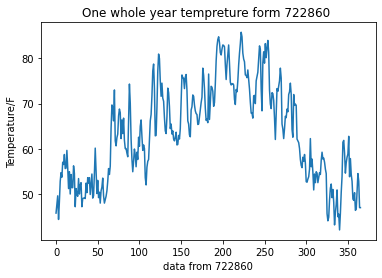

In [5]:
plt.plot(list(tem_avg.values())[-1])
plt.xlabel("data from %s"%SITE_CODE)
plt.ylabel("Temperature/F")
plt.title("One whole year tempreture form %s "%SITE_CODE)
plt.plot()

## 

## 所有时间的温度

In [6]:
tem_avg_list = []
for i in range(int(min(tem_avg)), int(max(tem_avg))+1):
    tem_avg_list.extend(tem_avg[str(i)])

tem_min_list = []
for i in range(int(min(tem_min)), int(max(tem_min))+1):
    tem_min_list.extend(tem_min[str(i)])

tem_max_list = []
for i in range(int(min(tem_max)), int(max(tem_max))+1):
    tem_max_list.extend(tem_max[str(i)])

index_list = []
for i in range(int(min(index)), int(max(index))+1):
    index_list.extend(index[str(i)])

### 去掉缺失标识

In [9]:
"""tem_max_list = [ 100.5604 if tem_max_list[i] == 999.9 else tem_max_list[i]  for i in range(len(tem_max_list))]
tem_min_list = [ 100.5604 if tem_min_list[i] == 999.9 else tem_min_list[i]  for i in range(len(tem_min_list))]
tem_avg_list = [ 100.5604 if tem_avg_list[i] == 999.9 else tem_avg_list[i]  for i in range(len(tem_avg_list))]

tem_max_list = [ (tem_max_list[i-1]+tem_max_list[i+1])/2 if tem_max_list[i] == 100.5604 else tem_max_list[i]  for i in range(len(tem_max_list))]
tem_min_list = [ (tem_min_list[i-1]+tem_min_list[i+1])/2 if tem_min_list[i] == 100.5604 else tem_min_list[i]  for i in range(len(tem_min_list))]
tem_avg_list = [ (tem_avg_list[i-1]+tem_avg_list[i+1])/2 if tem_avg_list[i] == 100.5604 else tem_avg_list[i]  for i in range(len(tem_avg_list))]"""

def cal_linear(tem_list):
    for i in range(len(tem_list)):
        if tem_list[i] == 999.9:
            j = i
            while tem_list[j] == 999.9:
                j+=1
            k = (tem_list[j+1] - tem_list[i-1])/(j-i+2)
            for index in range(i,j+1):
                tem_list[index] = (i-index+1)*k + tem_list[i-1]

In [10]:
cal_linear(tem_avg_list)
cal_linear(tem_max_list)
cal_linear(tem_min_list)

### 绘制全年图片

[]

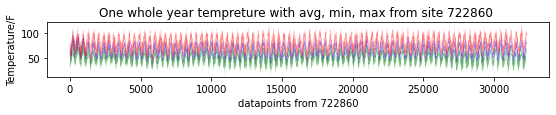

In [11]:
plt.gcf().set_size_inches(9, 1)
plt.xlabel("Days from %s"%SITE_CODE)
plt.ylabel("Temperature/F")
plt.title("All Temperatures of Station %s 1929-2021"%SITE_CODE)
# , tem_min_list , tem_max_list
plt.plot(tem_avg_list,color="b", alpha = 0.5, linewidth=0.1)
plt.plot(tem_min_list,color="g", alpha = 0.5, linewidth=0.1)
plt.plot(tem_max_list,color="r", alpha = 0.5, linewidth=0.1)
plt.xlabel("datapoints from %s"%SITE_CODE)
plt.ylabel("Temperature/F")
plt.title("One whole year tempreture with avg, min, max from site %s "%SITE_CODE)
plt.savefig(f"./fig/tem_annual_{SITE_CODE}.jpg")
plt.plot()

## 数据检查

In [12]:
def data_check(tem_list, name):
    global index_list
    print("Max:\n", tem_list[np.argmax(tem_list)], "\n",
      "\tEnvironment:", tem_list[np.argmax(tem_list)-2:np.argmax(tem_list)+3], "\n",
      "\tFilename:", index_list[np.argmax(tem_list)], "\n",
      "Min:\n", tem_list[np.argmin(tem_list)], "\n",
      "\tEnvironment:",tem_list[np.argmin(tem_list)-2:np.argmin(tem_list)+3], "\n",
      "\tFilename:",index_list[np.argmin(tem_list)])
    plt.gcf().set_size_inches(9, 1)
    plt.xlabel(f"{name} data index from %s"%SITE_CODE)
    plt.ylabel("Temperature/F")
    plt.title(f"{name} data from %s "%SITE_CODE)
    plt.plot(tem_list, linewidth=0.1)
    plt.savefig(f"./fig/tem_{name}_{SITE_CODE}_afterpre_annual.jpg")
    plt.show()

Max:
 105.4 
 	Environment: [87.1, 98.6, 105.4, 86.4, 90.9] 
 	Filename: ['19340727', 'data_op/722860/722860-23119-1934.op'] 
 Min:
 31.1 
 	Environment: [35.3, 32.4, 31.1, 32.2, 32.5] 
 	Filename: ['19370122', 'data_op/722860/722860-23119-1937.op']


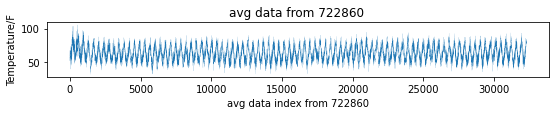

Max:
 93.4 
 	Environment: [80.2, 80.2, 93.4, 81.3, 71.2] 
 	Filename: ['19330813', 'data_op/722860/722860-23119-1933.op'] 
 Min:
 17.1 
 	Environment: [25.0, 33.1, 17.1, 28.0, 30.0] 
 	Filename: ['19681221', 'data_op/722860/722860-23119-1968.op']


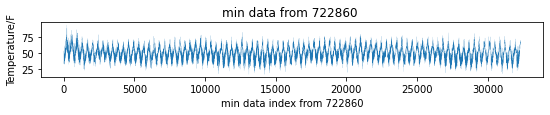

Max:
 115.7 
 	Environment: [102.9, 115.3, 115.7, 105.3, 95.7] 
 	Filename: ['20200906', 'data_op/722860/722860-23119-2020.op'] 
 Min:
 37.4 
 	Environment: [49.3, 43.3, 37.4, 41.4, 42.4] 
 	Filename: ['19370121', 'data_op/722860/722860-23119-1937.op']


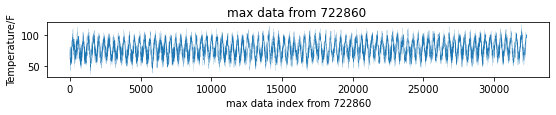

In [13]:
data_check(tem_avg_list, "avg")
data_check(tem_min_list, "min")
data_check(tem_max_list, "max")

## EMD

In [14]:
def emd(tem_list, name):
    tem_avg_array = np.array(tem_avg_list)
    emd_obj = PyEMD.EMD()
    imfs = emd_obj.emd(tem_avg_array)
    
    plt.plot(imfs.T, alpha = 0.75, linewidth=0.1)
    plt.xlabel(f"{name} data index from %s"%SITE_CODE)
    plt.ylabel("Temperature/F")
    plt.title(f"{name} imfs combine")
    plt.gcf().set_size_inches(20, 2)
    plt.savefig(f"./fig/imfs_{name}_%s.jpg"%SITE_CODE)
    plt.show()
    
    fig, axes = plt.subplots(len(imfs), 1)
    _ = [axes[i].plot(imfs[i], linewidth=0.5) for i in range(len(imfs))]
    plt.xlabel(f"{name} data index from %s"%SITE_CODE)
    plt.ylabel("Temperature/F")
    plt.gcf().set_size_inches(14, 10)
    plt.savefig(f"./fig/imfs_{name}_subplot_%s.jpg"%SITE_CODE)
    plt.show()
    
    return imfs

### 平均温度

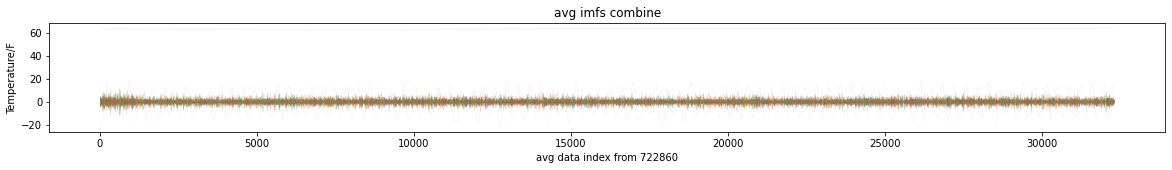

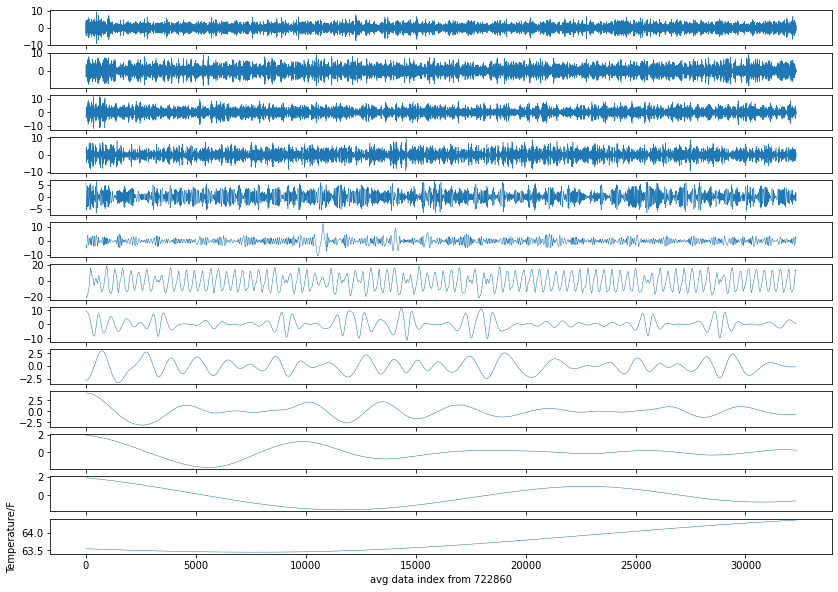

In [15]:
imfs_avg = emd(tem_avg_list, "avg")

### 最低温度

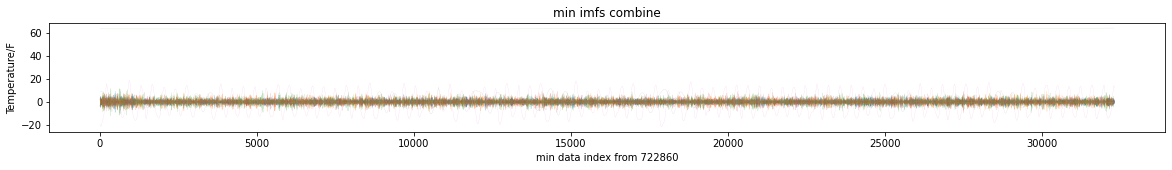

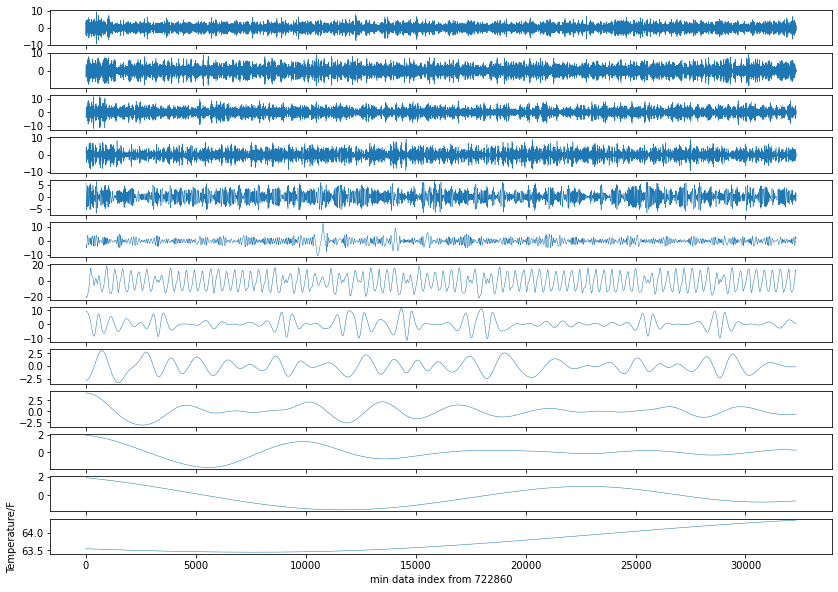

In [16]:
imfs_min = emd(tem_min_list, "min")

### 最高温度

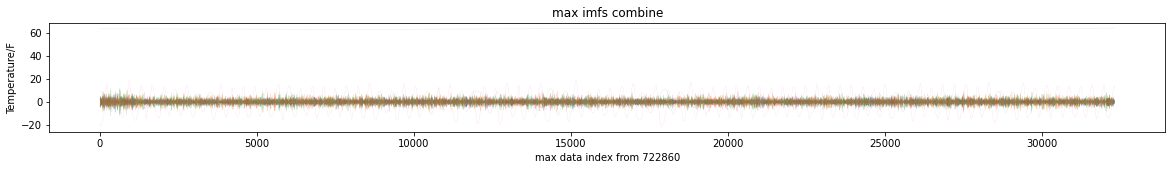

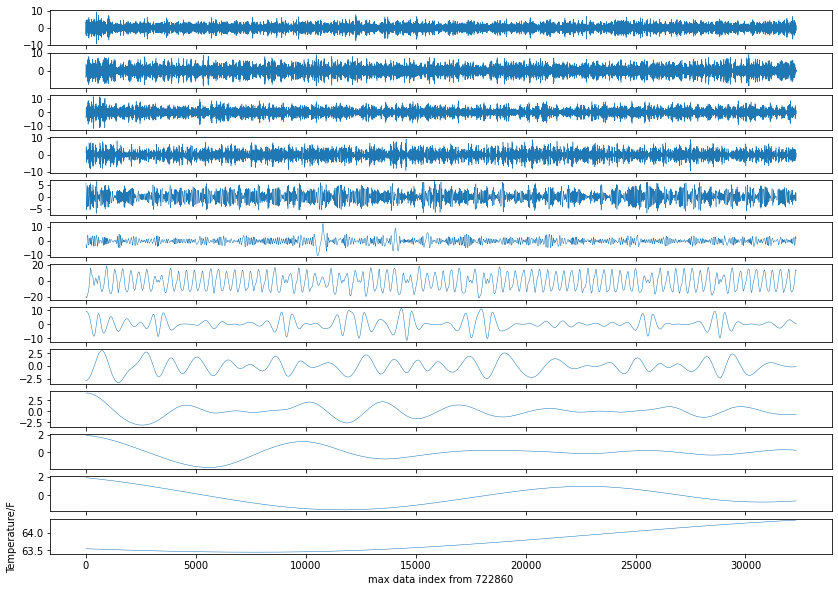

In [17]:
imfs_max = emd(tem_max_list, "max")

## 保存与备份

In [18]:
def save_array(numpy_array, name, path="./npy/"):
    global SITE_CODE
    if type(numpy_array) == np.ndarray:
        try:
            np.save(path+name+"_"+SITE_CODE, numpy_array)
        except FileNotFoundError as e:
            print(e)
            print("Trying to create folder to save.")
            import os
            os.mkdir(path)
            save_array(numpy_array, path)

In [19]:
save_array(imfs_avg, "avg")
save_array(imfs_min, "min")
save_array(imfs_max, "max")